In [107]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

# Entire Dataset

In [108]:
dataset=pd.read_csv("../Dataset/training_data.csv",index_col=0)

In [110]:
dataset.head()

,Year,Total Multilateral,Total Bilateral,International Monetary Fund,Trade Credit,Total Commercial Borrowings,NRI & FC(B&O) Deposits,Rupee Debt,Total Long-Term Debt
0,1991,40386,27378,5132.0,8374,19727,20030,25199,146226
1,1992,68262,47603,8934.0,12418,35711,27384,31956,232268
2,1993,77758,50258,14985.0,13484,36367,34941,33149,260942
3,1994,82199,54580,15812.0,16307,38782,39729,31634,279043
4,1995,89819,63761,13545.0,20876,40915,39006,30315,298237


### Dataset column names

In [111]:
dataset.columns

Index(['Year', 'Total Multilateral', 'Total Bilateral',
       ' International Monetary Fund', 'Trade Credit',
       'Total Commercial Borrowings', 'NRI & FC(B&O) Deposits', 'Rupee Debt',
       'Total Long-Term Debt'],
      dtype='object')

# Only 'Total Multilateral' Column

In [112]:
total_multilateral_df = dataset[['Year','Total Long-Term Debt']]

In [113]:
total_multilateral_df.shape

(26, 2)

In [114]:
total_multilateral_df.head()

,Year,Total Long-Term Debt
0,1991,146226
1,1992,232268
2,1993,260942
3,1994,279043
4,1995,298237


In [115]:
total_multilateral_df = total_multilateral_df.set_index(['Year'])
total_multilateral_df.head()

,Total Long-Term Debt
Year,
1991,146226
1992,232268
1993,260942
1994,279043
1995,298237


# Plot the graph

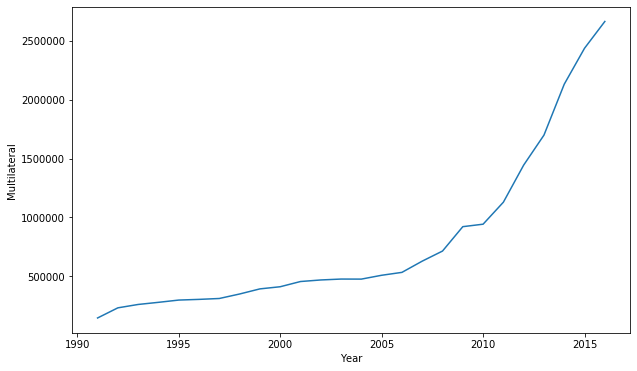

In [116]:
plt.xlabel("Year")
plt.ylabel("Multilateral")
plt.plot(total_multilateral_df)

## Check Stationarity of data

#### Determining rolling statistics

In [117]:
def rollmean_and_rollstd(df):
    # rolling mean
    rollmean = df.rolling(window=3).mean()
    #rolling std
    rollstd = df.rolling(window=3).std()
    return rollmean,rollstd

rollmean,rollstd = rollmean_and_rollstd(total_multilateral_df)
print(rollmean,rollstd)

      Total Long-Term Debt
Year                      
1991                   NaN
1992                   NaN
1993          2.131453e+05
1994          2.574177e+05
1995          2.794073e+05
1996          2.937903e+05
1997          3.046673e+05
1998          3.218393e+05
1999          3.515290e+05
2000          3.847670e+05
2001          4.200847e+05
2002          4.453420e+05
2003          4.670873e+05
2004          4.739213e+05
2005          4.872030e+05
2006          5.061173e+05
2007          5.569717e+05
2008          6.255157e+05
2009          7.548830e+05
2010          8.594427e+05
2011          9.977257e+05
2012          1.171971e+06
2013          1.424089e+06
2014          1.758079e+06
2015          2.088810e+06
2016          2.410428e+06       Total Long-Term Debt
Year                      
1991                   NaN
1992                   NaN
1993          59700.899904
1994          23585.818840
1995          18650.169177
1996          13102.679472
1997           6737.014349
1

#### Plot rolling Statistics

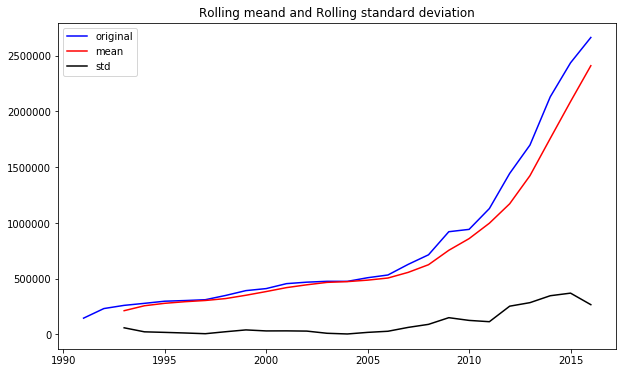

In [118]:
original = plt.plot(total_multilateral_df,color='blue',label='original')
mean = plt.plot(rollmean,color='red',label='mean')
std = plt.plot(rollstd,color='black',label='std')
plt.legend(loc='best')
plt.title('Rolling meand and Rolling standard deviation')
plt.show(block=False)

# Dickey-Fuller Test

In [119]:
from statsmodels.tsa.stattools import adfuller

In [120]:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(total_multilateral_df['Total Long-Term Debt'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  6.533975
p-value                         1.000000
#Lags Used                      0.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


# Trend Estimation

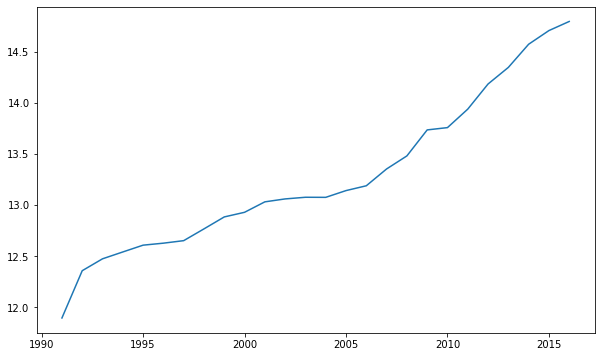

In [121]:
total_multilateral_df_logscale = np.log(total_multilateral_df)
plt.plot(total_multilateral_df_logscale)

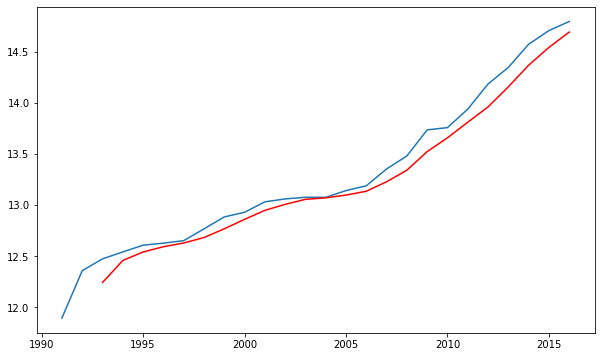

In [122]:
movingAvg, movingStd = rollmean_and_rollstd(total_multilateral_df_logscale)
plt.plot(total_multilateral_df_logscale)
plt.plot(movingAvg,color='red')

In [123]:
logscaleMinusMovingAvg = total_multilateral_df_logscale - movingAvg
logscaleMinusMovingAvg.dropna(inplace=True)
logscaleMinusMovingAvg.head()

,Total Long-Term Debt
Year,
1993,0.231850
1994,0.083514
1995,0.066704
1996,0.035133
1997,0.022900


In [124]:
logscaleMinusMovingAvg.head(10)

,Total Long-Term Debt
Year,
1993,0.231850
1994,0.083514
1995,0.066704
1996,0.035133
1997,0.022900
1998,0.085057
1999,0.116416
2000,0.069210
2001,0.083314


In [125]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

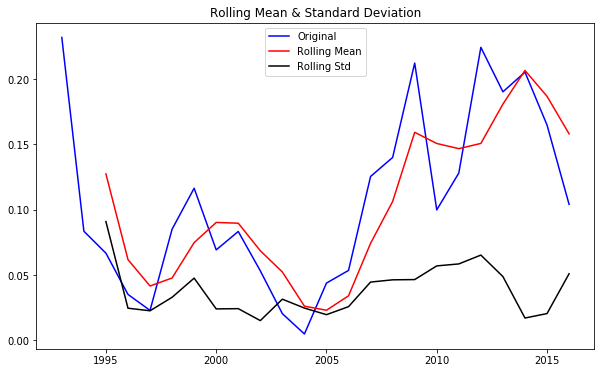

Results of Dickey-Fuller Test:
Test Statistic                 -2.696964
p-value                         0.074565
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [126]:
test_stationarity(logscaleMinusMovingAvg)

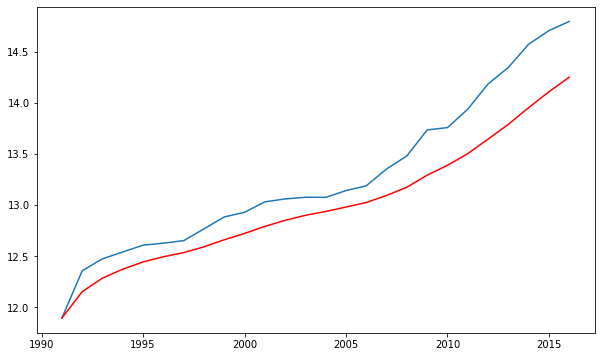

In [127]:
expWeightedAvg = total_multilateral_df_logscale.ewm(halflife=3,min_periods=0,adjust=True).mean()
plt.plot(total_multilateral_df_logscale)
plt.plot(expWeightedAvg,color='red')

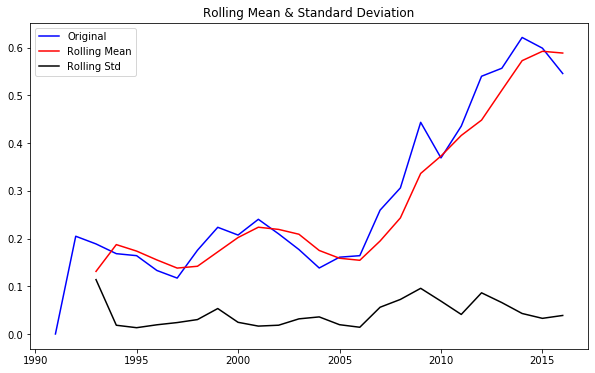

Results of Dickey-Fuller Test:
Test Statistic                 -1.060614
p-value                         0.730520
#Lags Used                      0.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [128]:
logscaleMinusexpWeightedAvg = total_multilateral_df_logscale - expWeightedAvg
test_stationarity(logscaleMinusexpWeightedAvg)

# Seasonality 
### Shifting

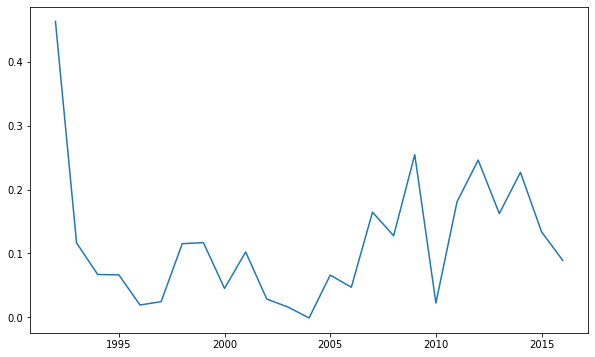

In [129]:
datasetLogDiffShifting = total_multilateral_df_logscale - total_multilateral_df_logscale.shift()
plt.plot(datasetLogDiffShifting)

In [130]:
datasetLogDiffShifting.dropna(inplace=True)

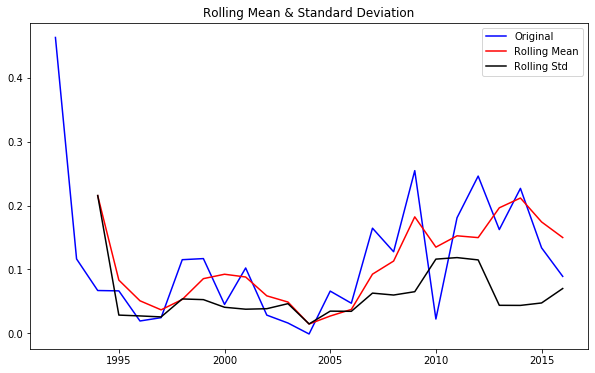

Results of Dickey-Fuller Test:
Test Statistic                 -2.632693
p-value                         0.086427
#Lags Used                      1.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [131]:
test_stationarity(datasetLogDiffShifting)

<ipython-input-132-4047da40f7c7>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(total_multilateral_df_logscale,freq=5)


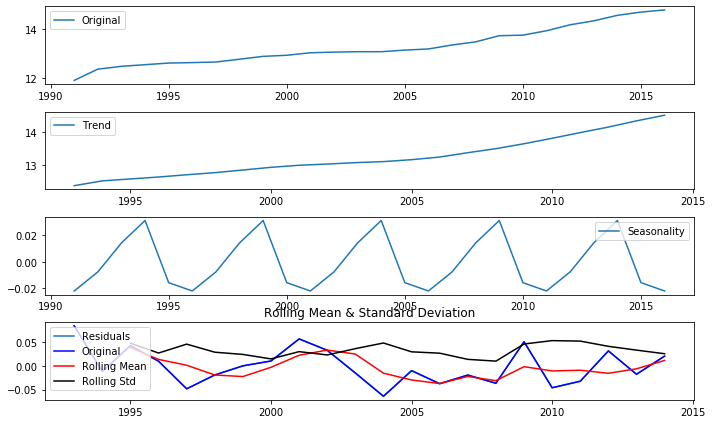

Results of Dickey-Fuller Test:
Test Statistic                 -2.847947
p-value                         0.051744
#Lags Used                      9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [132]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(total_multilateral_df_logscale,freq=5)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(total_multilateral_df_logscale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

In [186]:
residual

Year
1993    0.084827
1994   -0.011342
1995    0.042972
1996    0.010048
1997   -0.048186
1998   -0.018977
1999    0.000306
2000    0.010531
2001    0.057165
2002    0.033152
2003   -0.014803
2004   -0.063951
2005   -0.009853
2006   -0.037375
2007   -0.019135
2008   -0.036473
2009    0.051217
2010   -0.045974
2011   -0.032162
2012    0.031845
2013   -0.017480
2014    0.020865
Name: resid, dtype: float64

# AutoCorrelative and Partial AutoCorrelative Graph

C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


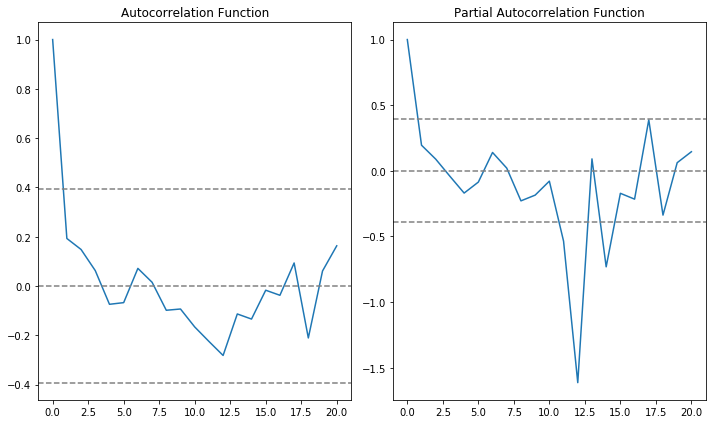

In [133]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Arima Model Implementation

C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Plotting AR model


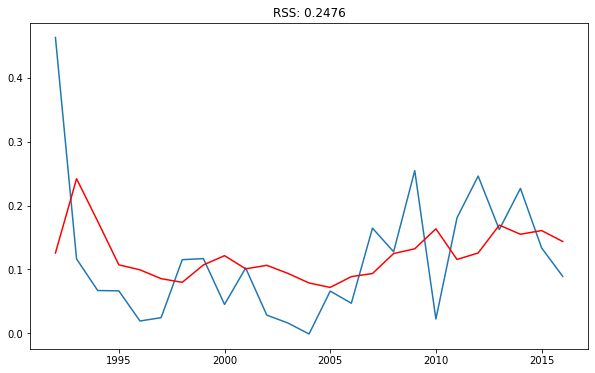

In [134]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(total_multilateral_df_logscale, order=(2,1,0))
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Total Long-Term Debt"])**2))
print('Plotting AR model')

C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Plotting AR model


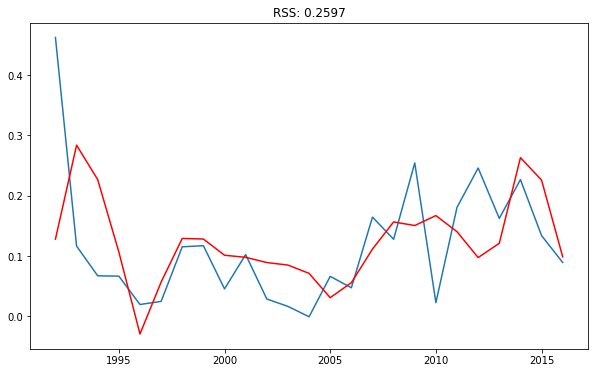

In [135]:
#MA MODEL
model = ARIMA(total_multilateral_df_logscale, order=(0, 1, 3))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["Total Long-Term Debt"])**2))
print('Plotting AR model')

C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


Text(0.5, 1.0, 'RSS: 0.2362')

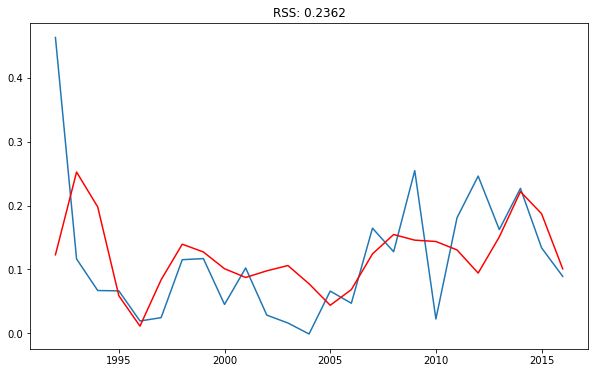

In [136]:
model = ARIMA(total_multilateral_df_logscale, order=(2, 1, 3))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Total Long-Term Debt"])**2))

In [137]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

Year
1992    0.122938
1993    0.252323
1994    0.197766
1995    0.058839
1996    0.011396
dtype: float64


In [138]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

Year
1992    0.122938
1993    0.375260
1994    0.573026
1995    0.631866
1996    0.643261
dtype: float64


In [139]:
predictions_ARIMA_log = pd.Series(total_multilateral_df_logscale['Total Long-Term Debt'].iloc[0], index=total_multilateral_df_logscale['Total Long-Term Debt'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Year
1991    11.892909
1992    12.015846
1993    12.268169
1994    12.465935
1995    12.524774
dtype: float64

Text(0.5, 1.0, 'RMSE: 159311.3195')

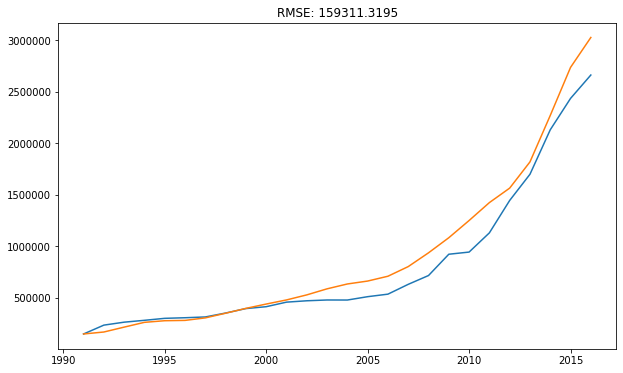

In [140]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(total_multilateral_df)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-total_multilateral_df["Total Long-Term Debt"])**2)/len(total_multilateral_df["Total Long-Term Debt"])))

In [141]:
total_multilateral_df.shape

(26, 1)

C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


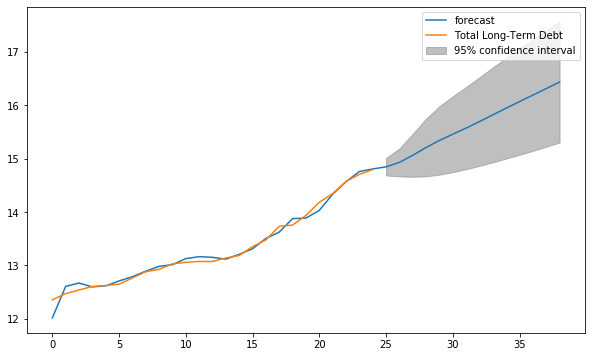

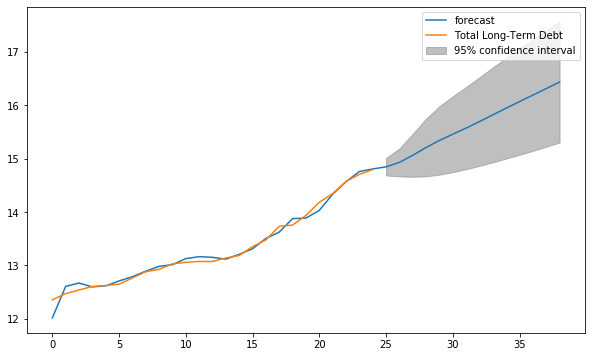

In [154]:
results_ARIMA.plot_predict(1,39)

In [143]:
total_multilateral_df_logscale

,Total Long-Term Debt
Year,
1991,11.892909
1992,12.355647
1993,12.472053
1994,12.539121
1995,12.605644
1996,12.625082
1997,12.649713
1998,12.764982
1999,12.881972


In [174]:
output = results_ARIMA.forecast(steps=5)

In [175]:
output

(array([14.8477058 , 14.92991567, 15.06211983, 15.20949477, 15.34165965]),
 array([0.08333902, 0.13352193, 0.20515188, 0.27575406, 0.32702743]),
 array([[14.68436432, 15.01104727],
        [14.66821749, 15.19161385],
        [14.66002953, 15.46421013],
        [14.66902674, 15.74996279],
        [14.70069767, 15.98262162]]))

In [185]:
np.exp(output[0])

array([2807221.59970178, 3047754.57345776, 3478528.19363324,
       4030877.96351632, 4600426.82838818])

In [180]:
forecast = results_ARIMA.predict(1,30)

C:\Users\santosh\Miniconda3\envs\idp_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [182]:
np.exp(forecast)

0     1.130814
1     1.287011
2     1.218678
3     1.060605
4     1.011461
5     1.087494
6     1.149713
7     1.135781
8     1.106440
9     1.091439
10    1.102815
11    1.111975
12    1.080634
13    1.044976
14    1.070898
15    1.132346
16    1.167210
17    1.156980
18    1.154594
19    1.139435
20    1.098935
21    1.162908
22    1.248238
23    1.205814
24    1.106240
25    1.053898
26    1.085684
27    1.141341
28    1.158788
29    1.141296
dtype: float64